In [1]:
import skimage
import math
from skimage import io,data, color,img_as_float
import scipy
from scipy import ndimage
from skimage.restoration import denoise_bilateral,denoise_wavelet,denoise_tv_chambolle,estimate_sigma

import PIL
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

([], <a list of 0 Text yticklabel objects>)

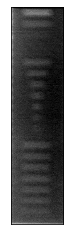

In [2]:
#importing image
testImage = skimage.io.imread("./new_pic_cropped.jpg", as_gray=False)
plt.imshow(testImage)
plt.xticks([])
plt.yticks([])

In [3]:
testImage_gray = color.rgb2gray(testImage)

([], <a list of 0 Text yticklabel objects>)

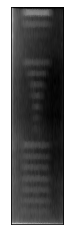

In [4]:
#denoise tv -- more weight leads to more denoising

image_tv_denoised = denoise_tv_chambolle(testImage_gray,weight=0.15,multichannel=True)

#LUT= np.zeros(256,dtype=np.float64)
#LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True,dtype=np.float64)


plt.imshow(image_tv_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [6]:
#test to find the sigma value of noise
sigma_est = estimate_sigma(testImage_gray,multichannel=True,average_sigmas=True)
sigma_est

0.011919836786459272

In [7]:
#denoise bilateral --
image_bilateral_denoised = denoise_bilateral(testImage_gray,sigma_color=0.04,sigma_spatial=100,multichannel =False)

#plt.imshow((int)(image_bilateral_denoised * 255), cmap="gray",interpolation="nearest")
#plt.xticks([])
#plt.yticks([])

In [0]:
#denoise wavelet
image_wavelet_denoised2 = denoise_wavelet(testImage,mode="soft" ,method="VisuShrink" ,multichannel=True,convert2ycbcr=False, rescale_sigma=True,sigma=sigma_est/4)

plt.imshow(image_wavelet_denoised2) #cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [0]:
#denoise wavelet
image_wavelet_denoised = denoise_wavelet(testImage,mode="soft",me  ,multichannel=True,convert2ycbcr=False)

plt.imshow(image_wavelet_denoised) #cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

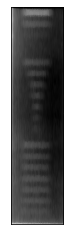

In [7]:
#gaussian filter
gauss_denoised = ndimage.gaussian_filter(image_tv_denoised, 0.5)

plt.imshow(gauss_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

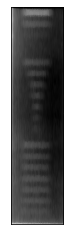

In [8]:
#median filter
median_denoised = ndimage.median_filter(testImage_gray, 2)

plt.imshow(gauss_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])